In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from ipywidgets import interact, IntSlider

In [2]:
# dataset import
spotify_raw = pd.read_csv('../data/spotify.csv', encoding="latin-1")

In [3]:
# checking head
spotify_raw.iloc[0].T

Track                                  MILLION DOLLAR BABY
Album Name                    Million Dollar Baby - Single
Artist                                       Tommy Richman
Release Date                                     4/26/2024
ISRC                                          QM24S2402528
All Time Rank                                            1
Track Score                                          725.4
Spotify Streams                                390,470,936
Spotify Playlist Count                              30,716
Spotify Playlist Reach                         196,631,588
Spotify Popularity                                    92.0
YouTube Views                                   84,274,754
YouTube Likes                                    1,713,126
TikTok Posts                                     5,767,700
TikTok Likes                                   651,565,900
TikTok Views                                 5,332,281,936
YouTube Playlist Reach                         150,597,0

In [4]:
# checking
spotify_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [5]:
# turning `Release Date` into datetime
spotify_raw['Release Date'] = pd.to_datetime(spotify_raw['Release Date'])
spotify_raw['All Time Rank'] = spotify_raw['All Time Rank'].str.replace(",", '').astype(int)
spotify_raw['Track Score'] = spotify_raw['Track Score'].astype(float)
spotify_raw['Spotify Streams'] = spotify_raw['Spotify Streams'].str.replace(',','').astype('Int64')
spotify_raw['Spotify Playlist Count'] = spotify_raw['Spotify Playlist Count'].str.replace(',','').astype('Int64')
spotify_raw['Spotify Playlist Reach'] = spotify_raw['Spotify Playlist Reach'].str.replace(',','').astype('Int64')
spotify_raw['YouTube Views'] = spotify_raw['YouTube Views'].str.replace(',','').astype('Int64')
spotify_raw['YouTube Likes'] = spotify_raw['YouTube Likes'].str.replace(',','').astype('Int64')
spotify_raw['TikTok Posts'] = spotify_raw['TikTok Posts'].str.replace(',','').astype('Int64')
spotify_raw['TikTok Views'] = spotify_raw['TikTok Views'].str.replace(',','').astype('Int64')
spotify_raw['YouTube Playlist Reach'] = spotify_raw['YouTube Playlist Reach'].str.replace(',','').astype('Int64')
spotify_raw['Apple Music Playlist Count'] = spotify_raw['Apple Music Playlist Count'].astype('Int64')
spotify_raw['AirPlay Spins'] = spotify_raw['AirPlay Spins'].str.replace(',','').astype('Int64')
spotify_raw['SiriusXM Spins'] = spotify_raw['SiriusXM Spins'].str.replace(',','').astype('Int64')
spotify_raw['Deezer Playlist Count'] = spotify_raw['Deezer Playlist Count'].astype('Int64')
spotify_raw['Deezer Playlist Reach'] = spotify_raw['Deezer Playlist Reach'].str.replace(',','').astype('Int64')
spotify_raw['Amazon Playlist Count'] = spotify_raw['Amazon Playlist Count'].astype('Int64')
spotify_raw['Pandora Streams'] = spotify_raw['Pandora Streams'].str.replace(',','').astype('Int64')
spotify_raw['Pandora Track Stations'] = spotify_raw['Pandora Track Stations'].str.replace(',','').astype('Int64')
spotify_raw['Soundcloud Streams'] = spotify_raw['Soundcloud Streams'].str.replace(',','').astype('Int64')
spotify_raw['Shazam Counts'] = spotify_raw['Shazam Counts'].str.replace(',','').astype('Int64')
spotify_raw.drop(columns='TIDAL Popularity', inplace=True)

In [6]:
# checking dtypes and size
spotify_raw.describe().T # we can drop tidal

,count,mean,min,25%,50%,75%,max,std
Release Date,4600,2021-01-27 07:48:18.782608896,1987-07-21 00:00:00,2019-07-16 18:00:00,2022-06-01 00:00:00,2023-08-11 00:00:00,2024-06-14 00:00:00,NaN
All Time Rank,4600.0,2290.678043,1.0,1144.75,2290.5,3436.25,4998.0,1322.878312
Track Score,4600.0,41.844043,19.4,23.3,29.9,44.425,725.4,38.543766
Spotify Streams,4487.0,447387314.745933,1071.0,70386298.5,239850720.0,628363805.0,4281468720.0,538443905.28127
Spotify Playlist Count,4530.0,59390.829801,1.0,6718.0,32312.5,86038.75,590392.0,71131.406625
Spotify Playlist Reach,4528.0,23346816.055212,1.0,4791611.5,13259481.0,29660692.5,262343414.0,29687169.344045
Spotify Popularity,3796.0,63.501581,1.0,61.0,67.0,73.0,96.0,16.186438
YouTube Views,4292.0,402796728.980196,913.0,40730320.25,148269610.0,464788240.5,16322756555.0,701900000.895103
YouTube Likes,4285.0,2930048.625204,25.0,409549.0,1257935.0,3573193.0,62311179.0,4593640.460858
TikTok Posts,3427.0,944307.620076,1.0,38186.5,182200.0,794877.5,42900000.0,2442079.611844


In [7]:
spotify_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       4600 non-null   object        
 1   Album Name                  4600 non-null   object        
 2   Artist                      4595 non-null   object        
 3   Release Date                4600 non-null   datetime64[ns]
 4   ISRC                        4600 non-null   object        
 5   All Time Rank               4600 non-null   int64         
 6   Track Score                 4600 non-null   float64       
 7   Spotify Streams             4487 non-null   Int64         
 8   Spotify Playlist Count      4530 non-null   Int64         
 9   Spotify Playlist Reach      4528 non-null   Int64         
 10  Spotify Popularity          3796 non-null   float64       
 11  YouTube Views               4292 non-null   Int64       

In [8]:
# artists?
spotify_raw['Artist'].value_counts()

Artist
Drake                       63
Taylor Swift                63
Bad Bunny                   60
KAROL G                     32
The Weeknd                  31
                            ..
Carrier                      1
Javed Ali                    1
The King Khan & BBQ Show     1
Marca MP                     1
BUSHIDO ZHO                  1
Name: count, Length: 1999, dtype: int64

In [9]:
# missingness in `spotify_streams`?
spotify_raw[spotify_raw['Spotify Streams'].isna()].head().T

,24,57,60,76,117
Track,Future,Dona Felicidade,Stereo Love - Melodic,Laxed ï¿½ï¿½ï¿½ Sire,Chegou a Hora de Ir para Cama (Playback)
Album Name,Future,Dona Felicidade,Stereo Love Deluxe (feat. Vika Jigulina),Laxed (Siren Beat),3 Palavrinhas Vol.9 (Playback)
Artist,official sound studio,Patati Patatï¿,Edward Maya,Jawsh 685,3 Palavrinhas
Release Date,2024-01-10 00:00:00,2024-06-04 00:00:00,2024-06-05 00:00:00,2020-04-24 00:00:00,2024-06-04 00:00:00
ISRC,RUA1H2415548,QZNJW2423715,ROCMA2413380,NZAM02001128,BXT622400190
All Time Rank,25,58,61,77,118
Track Score,277.5,190.0,187.9,168.9,142.4
Spotify Streams,<NA>,<NA>,<NA>,<NA>,<NA>
Spotify Playlist Count,1,2,2,10230,<NA>
Spotify Playlist Reach,2,41206,135,1142937,<NA>


In [10]:
# Extracting release month
spotify_raw['release_month'] = spotify_raw['Release Date'].dt.month
spotify_raw['day_of_release'] = spotify_raw['Release Date'].dt.day_name()

In [11]:
# Checking date distributions
release_month = spotify_raw['release_month'].value_counts().sort_index()
release_month

release_month
1     503
2     371
3     430
4     420
5     511
6     395
7     321
8     315
9     328
10    384
11    350
12    272
Name: count, dtype: int64

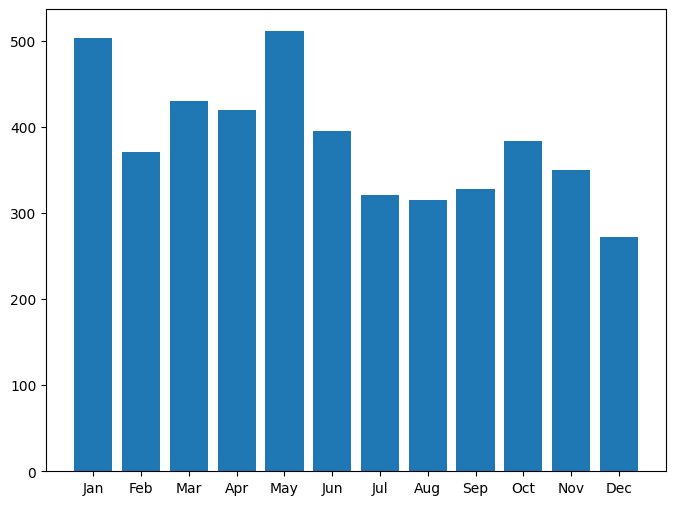

In [12]:
# Plotting release month
import calendar
fig, ax = plt.subplots(figsize=[8,6])
ax.bar(release_month.index, release_month.values)
ax.set_xticks(release_month.index)
ax.set_xticklabels([calendar.month_abbr[i] for i in release_month.index])
plt.show()

In [13]:
(spotify_raw['Artist'].value_counts() > 3).sum() # there are 

np.int64(265)

In [14]:
from ipywidgets import interactive, interact_manual

In [15]:
artist_counts = spotify_raw['Artist'].value_counts()
artist_counts[artist_counts <= 10]

Artist
Adele                       10
Junior H                    10
Camilo                      10
Coldplay                    10
Tiï¿½ï¿                     10
                            ..
Carrier                      1
Javed Ali                    1
The King Khan & BBQ Show     1
Marca MP                     1
BUSHIDO ZHO                  1
Name: count, Length: 1935, dtype: int64

In [ ]:
def plot_density(min_songs=0):
    # Filter artists with at least `min_songs` songs
    artist_counts = spotify_raw['Artist'].value_counts()
    valid_artists = artist_counts[artist_counts >= min_songs].index
    filtered_df = spotify_raw[spotify_raw['Artist'].isin(valid_artists)]
    
    # Determine artist tier for subtitle
    total_artists = len(valid_artists)
    if min_songs == 0:
        tier_desc = "All Artists"
    elif min_songs <= 5:
        tier_desc = "Emerging & Established Artists"
    elif min_songs <= 15:
        tier_desc = "Established Artists"
    else:
        tier_desc = "Major Artists Only"

    # Plot density histogram
    fig = px.histogram(
        filtered_df,
        x='release_month',
        nbins=12,
        histnorm='probability density',
        category_orders={"month": list(range(1,13))},
        labels={'release_month': 'Release Month'},
        title=f"Does Artist Size Influence Release Timing?<br><sub>{tier_desc} ({total_artists} artists, min {min_songs} songs)</sub>"
    )
    if min_songs <= 13: 
        colors = ['#8B4444' if month in [1,5] else 'grey' for month in range(1,13)]
    else: 
        colors = ['#8B4444' if month in [1, 10] else 'grey' for month in range(1,13)]

    fig.update_traces(marker_color=colors)
    fig.update_layout(
        bargap=0.2,
        plot_bgcolor='white',
        yaxis=dict(showgrid=True, gridwidth=1, gridcolor='lightgrey'),
        annotations=[
            dict(
                text="Artists across all success tiers are most likely to release<br>new music in <span style='color:#8B4444'>January</span> and <span style='color:#8B4444'>May</span>.<br><br>January is viewed as a fresh start for emerging,<br>independent artists, while May is popular for the start<br>of warm weather and \"festival season.\"",
                xref="paper", yref="paper",
                x=1.02, y=1.25,  # Upper right corner
                xanchor="right", yanchor="top",
                showarrow=False,
                font=dict(size=9),
                bgcolor="rgba(255,255,255,0.8)", 
                bordercolor="lightgrey",
                borderwidth=1
            )
        ] if min_songs <= 13 else [
            dict(
                text="Above 14 songs, we can see <span style='color:#8B4444'>October</span> starting to become a<br>more popular option for more established artists, and<br><span style='color:#8B4444'>January</span> begins to become less popular.",
                xref='paper', yref='paper', 
                x=1.02, y=1.25, 
                xanchor='right', yanchor='top', 
                showarrow=False,
                font=dict(size=9), 
                bgcolor='rgba(255,255,255,0.8)', 
                bordercolor='lightgrey', 
                borderwidth=1
            )
        ]
)

    fig.update_xaxes(tickmode='array', tickvals=list(range(1,13)),
                     ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    
    fig.update_yaxes(title_text="Density")

    # Set fixed figure size
    fig.update_layout(width=800, height=500)

    fig.show() 

# Create the interactive widget (doesn't auto-display)
widget = interactive(plot_density, min_songs=IntSlider(min=0, max=40, step=1, value=0, 
                                                      description='Min Songs'), 
                                                      style={'description_width': '150px'})
display(widget)

interactive(children=(IntSlider(value=0, description='Min Songs', max=40), Output()), _dom_classes=('widget-in…